In [23]:
a = 0
x = lambda a : a + 10
print(x(5))

15


In [24]:
def foo(num):
    
    return num + 10

In [26]:
print(foo(5))
print(x(5))

15
15


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import clone
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

C:\Users\rohanr730\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
n_classes = 3
# Change #n_estimators to see interesting changes in the plots
n_estimators = 20
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [3]:
def prepare_data():
    
    iris = load_iris()
    # Using first two features only
    X = iris.data[:, [0,1]]
    y = iris.target
    
    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std
    
    return X, y

In [4]:
def train(model):
    
    clf = clone(model)
    clf = model.fit(X,y)
    scores = clf.score(X,y)
    
    return scores

In [5]:
def plot_boundaries(model):
    
    estimator_alpha = 1.0 / len(model.estimators_)
        
    for tree in model.estimators_:
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap, zorder = 0)


    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['r', 'y', 'b']), edgecolor='k', s=20, zorder = 1)

    plt.suptitle("Random forest on features subsets Iris dataset")
    plt.axis("tight")

    plt.show()

In [6]:
def plot_coarseview(model):
    
    estimator_alpha = 1.0 / len(model.estimators_)
        
    for tree in model.estimators_:
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap, zorder = 0)

    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                            np.arange(y_min, y_max, plot_step_coarser))

    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(), yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15, c=Z_points_coarser, cmap=cmap, edgecolors="none", zorder = 1)


In [7]:
X, y = prepare_data()

In [8]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

In [9]:
model = RandomForestClassifier(n_estimators=n_estimators)
train(model)

0.92

## CLASSIFICATION
For classification we take average of all answers from all trees in the forest. For regression we take average


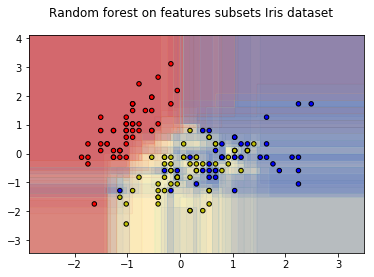

In [10]:
plot_boundaries(model)

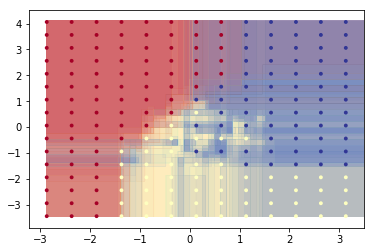

In [11]:
plot_coarseview(model)

## CRITERION

#### Entropy:
Each node has an entropy. Max = 1, min = 0.
We seek to reduce entropy and increase information gain, where information gain is defined as,

IG = Entropy(parent) - weighted_average x Entropy(child)

#### Gini:
Probability of obtaining two different outputs. We seek to reduce this.


Entropy is slower to calculate as it involves logarithmic calculations

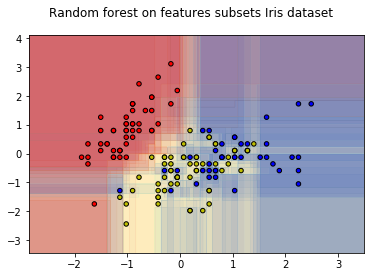

0.92


In [12]:
# Visualizing decision boundaries with Entropy criterion

model = RandomForestClassifier(criterion = "entropy", n_estimators=n_estimators)
score = train(model)
plot_boundaries(model)
print(score)

### N_ESTIMATORS

Number of trees in the forest

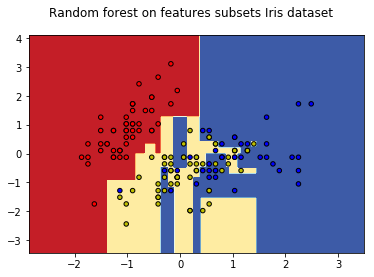

In [13]:
# Visualizing decision boundaries with just one tree in the forest

model = RandomForestClassifier(n_estimators=1)
train(model)
plot_boundaries(model)

### MAX FEATURES

[max_features] is the size of the random subsets of features to consider when splitting a node. Empirical good default values are max_features=n_features for regression problems, and max_features=sqrt(n_features) for classification tasks.


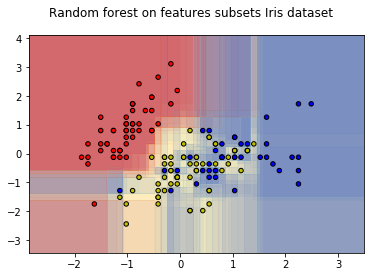

0.9266666666666666


In [14]:
# Visualizing decision boundaries with max subset size of 2

model = RandomForestClassifier(n_estimators=n_estimators, max_features = 2)
score = train(model)
plot_boundaries(model)
print(score)

### MIN_SAMPLES_SPLIT

No. of samples left with a node such that we can't split any further.
If min samples split is low then it leads to overfitting


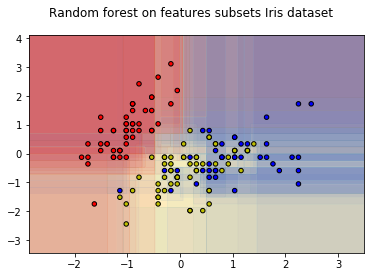

0.84


In [15]:
# Visualizing decision boundaries with min_samples_split = 10

model = RandomForestClassifier(n_estimators=n_estimators, min_samples_split = 10)
score = train(model)
plot_boundaries(model)
print(score)

The score has reduced because the model has reduced its overfitting. Earlier min_samples_split was 2 and therefore the score was 0.92.

### MIN_SAMPLES_LEAF

It is similar to min_samples_split.
min_samples_split specifies the minimum number of samples required to split an internal node, while min_samples_leaf specifies the minimum number of samples required to be at a leaf node.

For instance, if min_samples_split = 5, and there are 7 samples at an internal node, then the split is allowed. But let's say the split results in two leaves, one with 1 sample, and another with 6 samples. If min_samples_leaf = 2, then the split won't be allowed (even if the internal node has 7 samples) because one of the leaves resulted will have less then the minimum number of samples required to be at a leaf node.

### MAX_LEAF_NODES

Self-explanatory. Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity (gini). If None then unlimited number of leaf nodes.


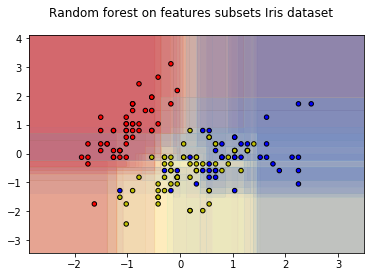

0.8333333333333334


In [16]:
# Visualizing decision boundaries with max_leaf_nodes = 10

model = RandomForestClassifier(n_estimators=n_estimators, max_leaf_nodes = 10)
score = train(model)
plot_boundaries(model)
print(score)

Performance reduction on using a max of 10 leaf nodes. Earlier it was unlimited.

### MIN_IMPURITY_SPLIT

Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

### BOOTSTRAP and OOB_SCORE

Whether bootstrap samples are used when building trees. For each tree, if the number of training examples is N, then N datapoints are sampled with replacement, if bootstrapping is turned on. Mathematically, this leads to approximately 1/3 of examples not being used. These unused examples can be used as an implicit validation test set and they are called out-of-bag samples. The score of the model on these OOB samples is called the OOB_SCORE.


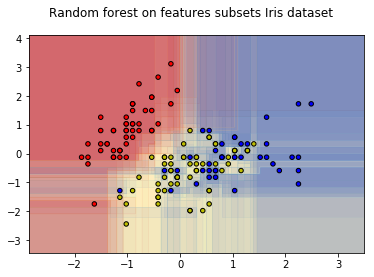

0.92
0.6933333333333334


In [17]:
# Visualizing decision boundaries with oob_score and bootstrapping turned on

model = RandomForestClassifier(n_estimators=n_estimators, oob_score = True)
score = train(model)
plot_boundaries(model)
print(score)
print(model.oob_score_)

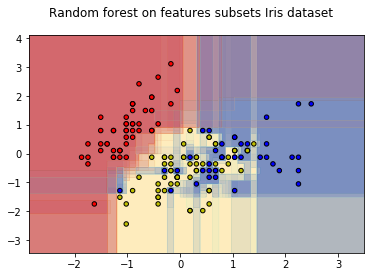

0.9266666666666666


In [18]:
# Visualizing decision boundaries with bootstrapping turned off

model = RandomForestClassifier(n_estimators=n_estimators, bootstrap = False)
score = train(model)
plot_boundaries(model)
print(score)


Here the decision boundaries are more pronounced and even the score has improved, but in general, bootstrapping is recommended for better generalization. 